ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [117]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

In [118]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
df= pd.DataFrame(data_q1, columns=['feature_1'])
median = df['feature_1'].median()
q1 = df['feature_1'].quantile(0.25)
q3 = df['feature_1'].quantile(0.75)
print(f'Median: {median}\nIQR: {q3-q1}')
# Yes 500 is the outlier because it is too much high compare to other data
# If we use mean + standard deviation then the outlier 500 will increase the value of mean, also the gap between data points will be more spread because of standard deviation.
# So, using median + IQR is a better choice because it catches big outlier perfectly.

Median: 33.0
IQR: 2.0


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._  
P(Disease) = .01 (1%)           
P(No Disease) = 1 - .01 (99%)   
P(Test+ | Disease) = (90%)
P(Test+ | No Disease) = 1 - .92 = .08  
True Positive = .9 * .01 = .009  
False Positive = .99 * .08 = .0792   
Total = .0792 + .009 = .0882  
Positive Predictive Value = .009/.0882 = .102 = 10.2%  


If the prevalence rises to 20% then:    
From Bayes Theorem, we know PPV = TP/(TP+FP)     
New TP = .90 * .20 = .18, New FP = .08 * .80 = 0.064     
New PPV = .18/(.18+.064) = .737 = 73.77%       
We increase prevalence, which also increases the numerator of the PPV equation.  
This is the reason PPV increases.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._    
1. This is a classification task. Either the user is premium or not.  
2. i. Handling missing values in age and purchases column.    
   ii. Encode region using one-hot encoding.         
   iii. Scaling all numerical festures         
   iv. Separate target comumns and features       




3. First analyzing the dataset by understand data spreading, underlying connections, ploting different graphs to get inshight about the dataset. Then I will handle missing values by filling them with mean, median or mode. Then I will encode the categorical features and split the data into traing and test set. The preprocessing steps will be in the pipeline. This is a classification problem so I will use Logistic Regression or Decision tree. Then I will test the dataset by getting accuracy, prediction, different metrices, etc.   

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [119]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

### Finding missing values,unique values and correlation

In [120]:
print('Missing values\n',df.isna().sum())
print()
print('No. of unique values per columns\n',df.nunique())
print()
print('Correlation\n',df.corr(numeric_only=True))

Missing values
 age             2
region          0
purchases       1
premium_user    0
dtype: int64

No. of unique values per columns
 age             5
region          4
purchases       6
premium_user    2
dtype: int64

Correlation
                    age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


# Histogram for purchases

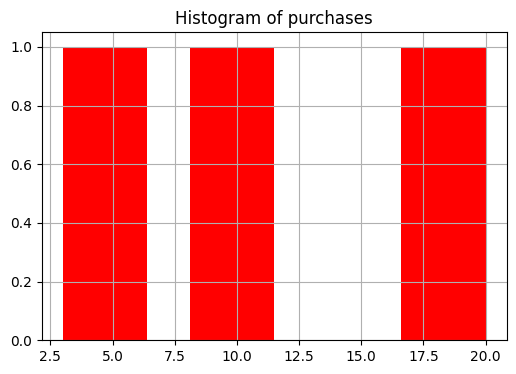

In [121]:
df['purchases'].hist(color='r')
plt.title('Histogram of purchases')
plt.show()

# Bar chart for region

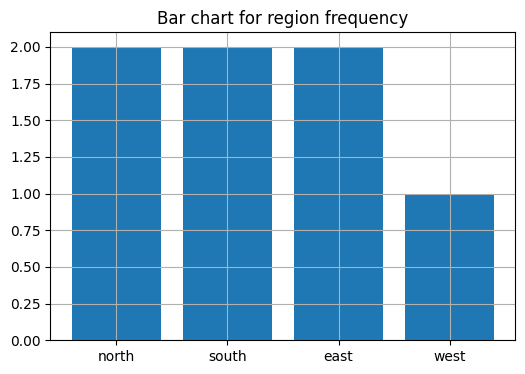

In [122]:
plt.bar(df['region'].unique(), df['region'].value_counts())
plt.title('Bar chart for region frequency')
plt.show()

### Filling missing values(age->median, purchases->mean) and scaling

In [123]:
df['age'] = df['age'].fillna(df['age'].median())
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())
df = pd.get_dummies(df, columns=['region'])
df[['age_robust', 'purchases']] = RobustScaler().fit_transform(df[['age', 'purchases']])

### Adding domain driven features to age column

In [124]:
df['age_group'] = pd.cut(
    df['age'],
    bins = [20,30,40,50,60],
    labels = ['Young','Middle_age','Old','Very_Old']
)
df


,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_robust,age_group
0,25.0,-0.943820,0,False,True,False,False,-0.5,Young
1,30.0,0.000000,1,False,False,True,False,0.0,Young
2,30.0,-0.674157,0,False,True,False,False,0.0,Young
3,22.0,0.112360,0,True,False,False,False,-0.8,Young
4,45.0,1.348315,1,False,False,False,True,1.5,Old
5,52.0,1.078652,1,False,False,False,True,2.2,Very_Old
6,30.0,-0.134831,0,False,False,True,False,0.0,Young


### Final transformed dataset

In [125]:
df[['region_east','region_north','region_south','region_west']] = df[['region_east','region_north','region_south','region_west']].astype(int)
order = {'Young':1,'Middle_age':2,'Old':3,'Very_Old':4}
df['age_group'] = df['age_group'].map(order).astype(int)
df

,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_robust,age_group
0,25.0,-0.943820,0,0,1,0,0,-0.5,1
1,30.0,0.000000,1,0,0,1,0,0.0,1
2,30.0,-0.674157,0,0,1,0,0,0.0,1
3,22.0,0.112360,0,1,0,0,0,-0.8,1
4,45.0,1.348315,1,0,0,0,1,1.5,3
5,52.0,1.078652,1,0,0,0,1,2.2,4
6,30.0,-0.134831,0,0,0,1,0,0.0,1


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [126]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


### Splitting, fitting and predicting the data

In [127]:
X_train,X_test,y_train,y_test = train_test_split(df2[['area_sqft','bedrooms']],df2['price'],test_size=.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f'Intercept: {lr.intercept_}\nCoefficient: {lr.coef_}')
y_pred = lr.predict(X_test)
print(f'Predictions: {y_pred}')

Intercept: -33.84615384615387
Coefficient: [0.15384615 5.38461538]
Predictions: [100.         130.76923077]


### Computing the metrices               
### Here r squared is negative because lack of data, size of our test data is only 2, so it cannot properly recognize the pattern. If we do not split the data and train with full dataset then these metrices scores will be better

In [128]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R squared',r2_score(y_test,y_pred))

Mean Absolute Error 19.615384615384613
Root Mean Squared Error 19.61915499208746
R squared -0.7107166337935567


### Residual plot

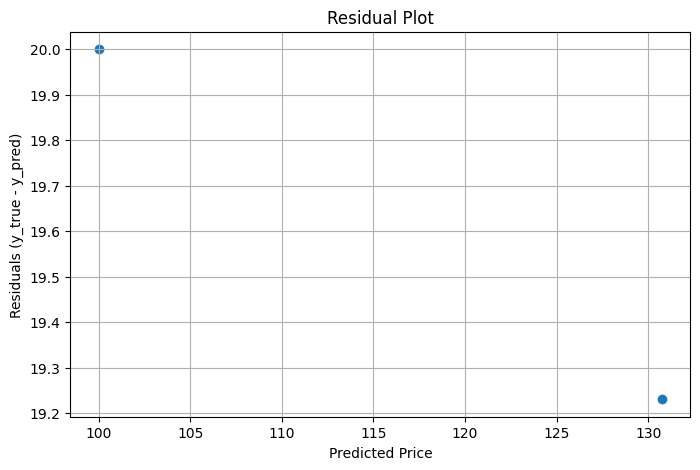

In [129]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (y_true - y_pred)')
plt.title('Residual Plot')
plt.show()
# There is not too much for observe because the dataset is very small. Also r squared value is not good because of the small dataset.


---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [130]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
y_pred_05 = (y_prob >= 0.5).astype(int)
y_pred_03 = (y_prob >= 0.3).astype(int)

# Confuson matrix for 0.5 threshold
# TP=5,FP=0,FN=0,TN=5
# Precision 1.0, Recall = 1.0, F1 Score = 1.0




# Confuson matrix for 0.3 threshold
# TP=5,FP=2,FN=0,TN=3
# Precision .71, Recall = 1.0, F1 Score = .83
# Lowering the threshold from .5 to .3 increases the recall because more samples are classified as positive, this reduced the number of false negative.
# This increases the number false positive thus precision is decreased.

#### Plotting ROC curve

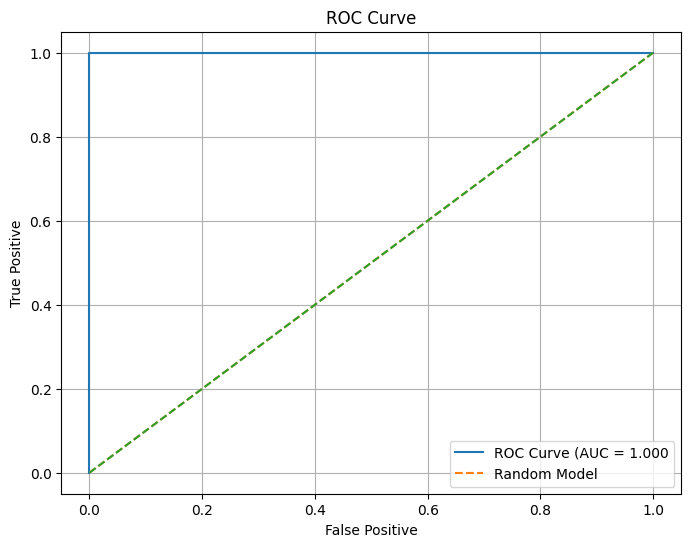

In [131]:
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],linestyle='--',label='Random Model')
plt.plot([0,1], [0,1], linestyle='--')
plt.legend()
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [132]:
print(f"AUC: {roc_auc:.3f}")
# High auc value means we separate the classes excelenly. A lower auc like 0.5 means lower separation or random guessing.

AUC: 1.000


### Decision tree classifier

In [133]:
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
tree = DecisionTreeClassifier(max_depth=2,random_state=42)
tree.fit(df3[['hours']],df3['passed'])

DecisionTreeClassifier(max_depth=2, random_state=42)

### Plotting the tree

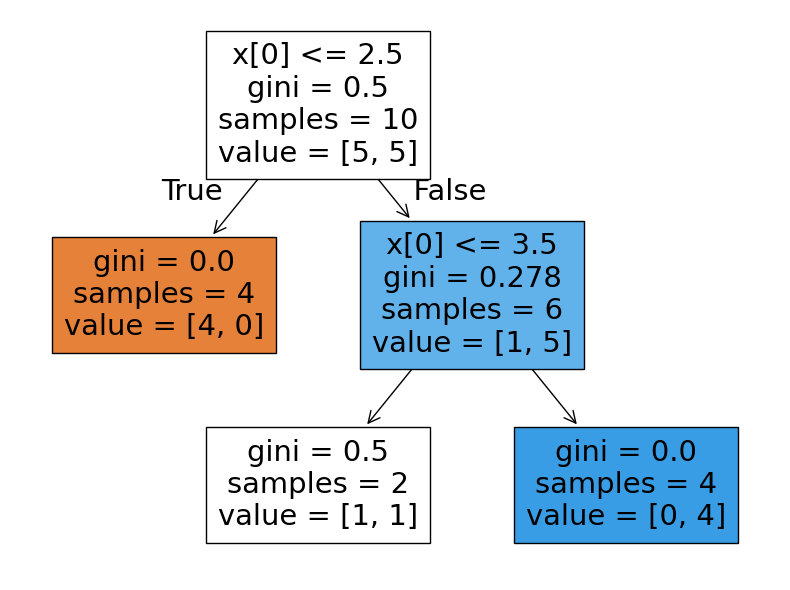

In [134]:
plt.figure(figsize = (8,6))
plot_tree(tree,filled=True)
plt.tight_layout()
plt.show()

### I think this model  can capture underlying features. Higher study time leads to passing the student. Which means the model generalizes well